In [2]:
import numpy as np
import pandas as pd

In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [3]:
pip install yfinance


In [4]:
pip install mplfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 1.0 MB/s eta 0:00:00


In [5]:
import pandas as pd
import pandas_datareader as web
import yfinance as yf
import datetime
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from pandas.plotting import scatter_matrix
from mplfinance.original_flavor import candlestick_ohlc
from matplotlib.dates import DateFormatter, date2num, WeekdayLocator, DayLocator, MONDAY

In [6]:
start = datetime.datetime(2016,1,1)
end = datetime.datetime(2023,12,31)

In [9]:
price_relnce = yf.download('RELIANCE.NS',start,end, auto_adjust=True)
# get last 5 rows
price_relnce.tail()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Volume
Date,,,,,
2023-12-22,2559.600098,2580.899902,2547.649902,2565.050049,8270892
2023-12-26,2568.000000,2591.949951,2562.699951,2578.050049,3732832
2023-12-27,2582.000000,2599.899902,2573.100098,2586.850098,4602078
2023-12-28,2589.800049,2612.000000,2586.850098,2605.550049,6151318
2023-12-29,2611.100098,2614.000000,2579.300049,2584.949951,5432292


In [10]:
price_tcs = yf.download('TCS.NS',start,end,auto_adjust=True)
# get last 5 rows
price_tcs.tail()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Volume
Date,,,,,
2023-12-22,3782.473244,3828.211260,3744.648512,3806.362549,2413058
2023-12-26,3802.231670,3816.316308,3772.668462,3778.043701,1285231
2023-12-27,3781.477657,3800.589051,3750.620640,3793.621338,1293976
2023-12-28,3806.362475,3820.297903,3774.609706,3782.373535,1682889
2023-12-29,3774.510119,3804.969079,3748.032709,3775.903564,1574996


In [11]:
price_tcs['Total Capital Traded'] = price_tcs['Open'] * price_tcs['Volume']
price_relnce['Total Capital Traded'] = price_relnce['Open'] * price_relnce['Volume']

In [12]:
price_tcs.head()

,Open,High,Low,Close,Volume,Total Capital Traded
Date,,,,,,
2016-01-01,1033.631108,1033.631108,1022.294645,1024.053345,712262,7.362162e+08
2016-01-04,1021.405005,1023.036650,1002.715790,1004.220276,1870184,1.910215e+09
2016-01-05,1010.746697,1011.424808,992.099798,995.468933,2678020,2.706800e+09
2016-01-06,995.998800,1011.234146,995.998800,1009.305969,2653228,2.642612e+09
2016-01-07,1004.389570,1009.856459,1000.151640,1004.919312,3199580,3.213625e+09


In [13]:
price_relnce.head()

,Open,High,Low,Close,Volume,Total Capital Traded
Date,,,,,,
2016-01-01,440.853813,444.826653,440.155313,443.276825,2708281,1.193956e+09
2016-01-04,438.758245,442.600115,430.768939,434.523468,15085473,6.618876e+09
2016-01-05,436.706372,440.941150,435.265685,438.823761,7473119,3.263559e+09
2016-01-06,439.893349,453.339895,436.750008,450.633118,13379932,5.885743e+09
2016-01-07,445.765294,448.799494,440.089830,442.360016,9869971,4.399691e+09


[*********************100%%**********************]  2 of 2 completed


Text(0.5, 1.0, 'Opening Price Comparison: Reliance vs TCS')

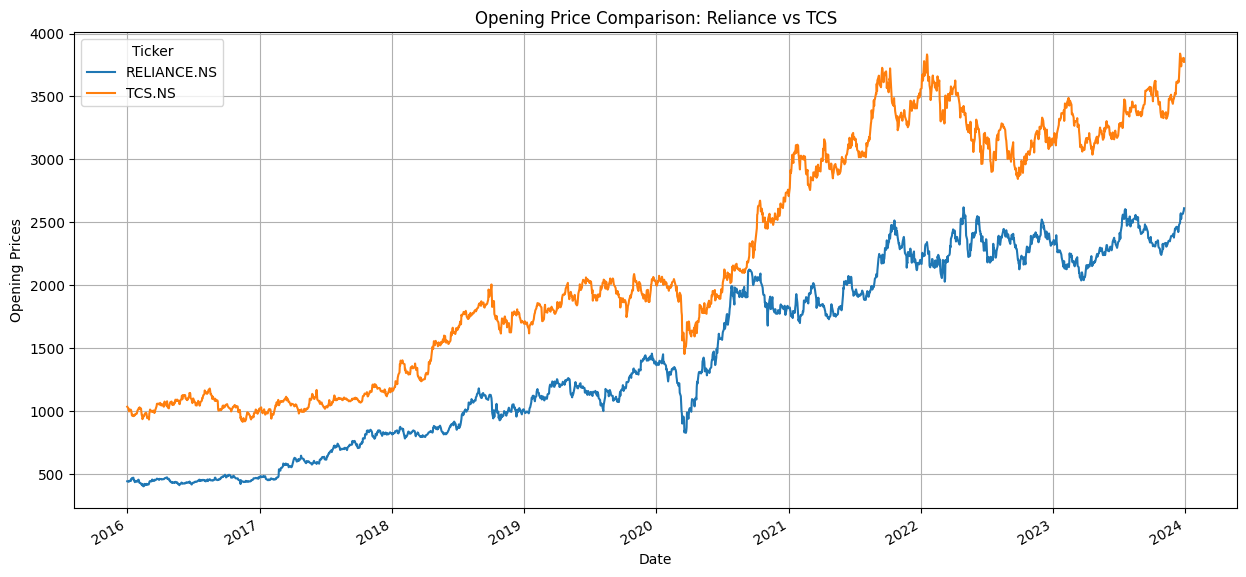

In [14]:
tickers_list = ['TCS.NS','RELIANCE.NS']
price_list = yf.download(tickers_list,start,end,auto_adjust=True)
price_list['Open'].plot(figsize=(15,7))
plt.ylabel('Opening Prices')
plt.grid(True)
plt.title('Opening Price Comparison: Reliance vs TCS')

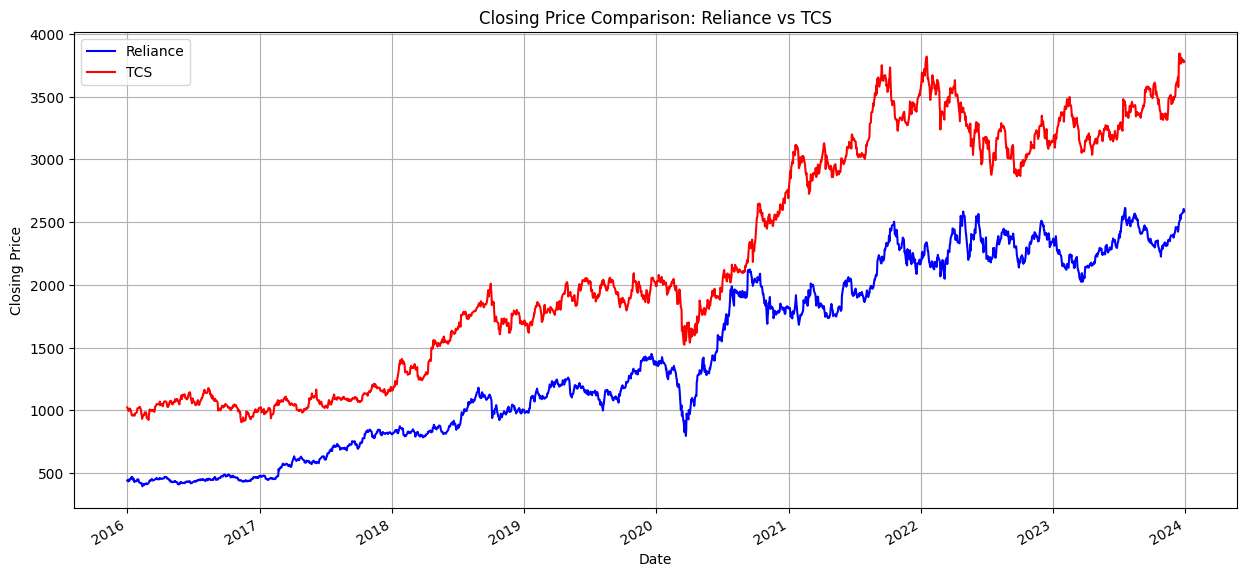

In [16]:

# visualising and compare close price of the stocks
plt.figure(figsize=(15, 7))

# Plotting closing price of Reliance
price_relnce['Close'].plot(color='blue', label='Reliance')

# Plotting closing price of TCS
price_tcs['Close'].plot(color='red', label='TCS')

plt.title('Closing Price Comparison: Reliance vs TCS')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()  # Show legend for the lines
plt.grid(True)
plt.show()

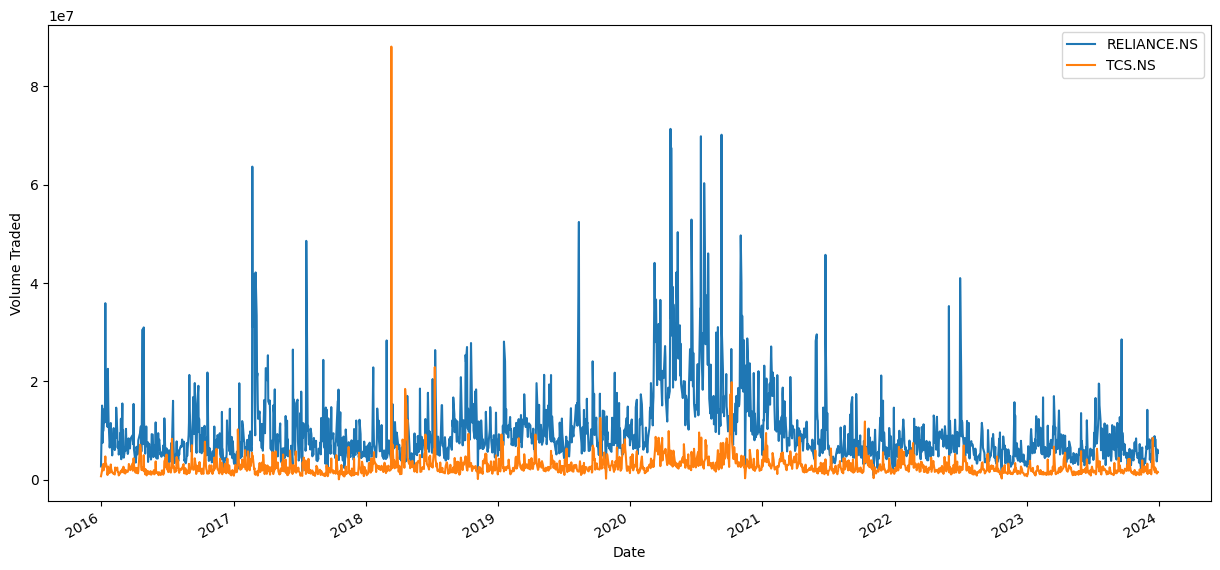

In [17]:
price_list['Volume'].plot(figsize=(15,7))
plt.ylabel('Volume Traded')
plt.legend()

Text(0, 0.5, 'Total Capital Traded')

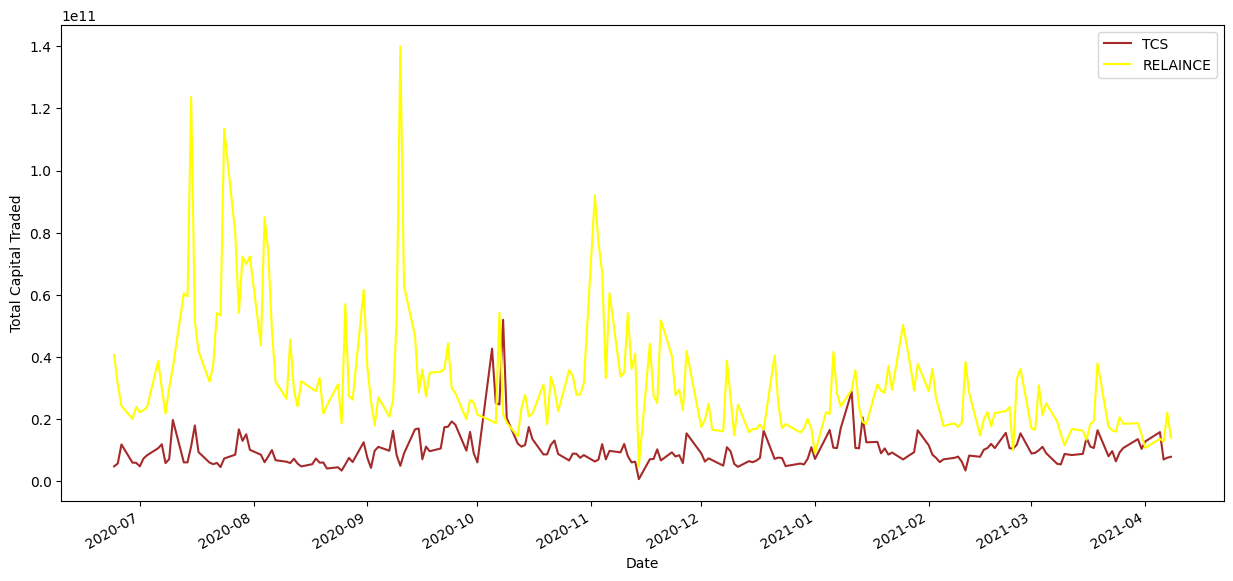

In [18]:
plt.figure(figsize=(15,7))
price_tcs.iloc[1100:1300]['Total Capital Traded'].plot(label='TCS', color='brown')
price_relnce.iloc[1100:1300]['Total Capital Traded'].plot(label='RELAINCE', color='yellow')
plt.legend()
plt.ylabel('Total Capital Traded')

In [19]:
price_relnce.iloc[[price_relnce['Volume'].argmax()]]

,Open,High,Low,Close,Volume,Total Capital Traded
Date,,,,,,
2020-04-22,1189.753392,1248.249617,1171.726859,1229.05127,71341683,8.487901e+10


In [20]:
price_tcs.iloc[[price_tcs['Volume'].argmax()]]

,Open,High,Low,Close,Volume,Total Capital Traded
Date,,,,,,
2018-03-13,1289.972912,1296.5002,1266.64239,1273.169678,88067154,1.136042e+11


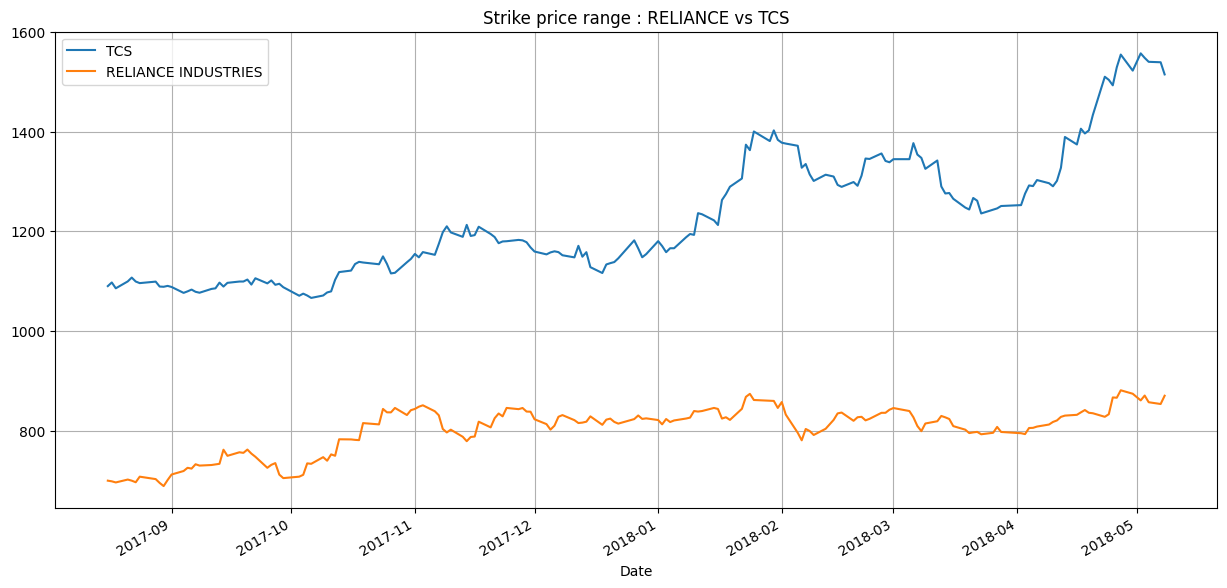

In [21]:
plt.figure(figsize=(15, 7))
price_tcs.iloc[400:580]['Open'].plot(label='TCS')
price_relnce.iloc[400:580]['Open'].plot(label='RELIANCE INDUSTRIES')
plt.title('Strike price range : RELIANCE vs TCS')
plt.xlabel('Date')
plt.legend()  # Show legend for the lines
plt.grid(True)
plt.show()

In [22]:
price_list.head()

Price            Close                     High                      Low  \
Ticker     RELIANCE.NS       TCS.NS RELIANCE.NS       TCS.NS RELIANCE.NS   
Date                                                                       
2016-01-01  443.276825  1024.053345  444.826653  1033.631108  440.155313   
2016-01-04  434.523468  1004.220276  442.600115  1023.036650  430.768939   
2016-01-05  438.823761   995.468933  440.941150  1011.424808  435.265685   
2016-01-06  450.633118  1009.305969  453.339895  1011.234146  436.750008   
2016-01-07  442.360016  1004.919312  448.799494  1009.856459  440.089830   

Price                          Open                   Volume           
Ticker           TCS.NS RELIANCE.NS       TCS.NS RELIANCE.NS   TCS.NS  
Date                                                                   
2016-01-01  1022.294645  440.853813  1033.631108     2708281   712262  
2016-01-04  1002.715790  438.758245  1021.405005    15085473  1870184  
2016-01-05   992.099798  436.706372  1010.746697     7473119  2678020  
2016-01-06   995.998800  439.893349   995.998800    13379932  2653228  
2016-01-07  1000.151640  445.765294  1004.389570     9869971  3199580

In [23]:
price_tcs = yf.Ticker("TCS.NS")
price_tcs.info

{'address1': 'TCS House',
 'address2': 'Raveline Street Fort',
 'city': 'Mumbai',
 'zip': '400001',
 'country': 'India',
 'phone': '91 22 6778 9595',
 'website': 'https://www.tcs.com',
 'industry': 'Information Technology Services',
 'industryKey': 'information-technology-services',
 'industryDisp': 'Information Technology Services',
 'sector': 'Technology',
 'sectorKey': 'technology',
 'sectorDisp': 'Technology',
 'longBusinessSummary': 'Tata Consultancy Services Limited provides information technology (IT) and IT enabled services worldwide. It operates through Banking, Financial Services and Insurance; Manufacturing; Retail and Consumer Business; Communication, Media and Technology; Life Sciences and Healthcare; and Others segments. The company provides TCS ADD, a suite of technology platforms for clinical research and drug development; TCS BaNCS, a financial solution platform; TCS BFSI Platforms, a cloud-native, as-a-service that helps FIs and insurance firms; TCS CHROMA, a cloud-ba

In [24]:
price_relnce = yf.Ticker("RELIANCE.NS")
price_relnce.info

{'address1': 'Maker Chambers IV',
 'address2': '3rd Floor 222 Nariman Point',
 'city': 'Mumbai',
 'zip': '400021',
 'country': 'India',
 'phone': '91 22 3555 5000',
 'fax': '91 22 2204 2268',
 'website': 'https://www.ril.com',
 'industry': 'Oil & Gas Refining & Marketing',
 'industryKey': 'oil-gas-refining-marketing',
 'industryDisp': 'Oil & Gas Refining & Marketing',
 'sector': 'Energy',
 'sectorKey': 'energy',
 'sectorDisp': 'Energy',
 'longBusinessSummary': 'Reliance Industries Limited engages in hydrocarbon exploration and production, oil and chemicals, textile, retail, digital, material and composites, renewables, and financial services businesses worldwide. The company produces and markets petroleum products, such as liquefied petroleum gas, propylene, naphtha, gasoline, jet/aviation turbine fuel, kerosene oil, diesel, Sulphur, and petroleum coke. It also provides petrochemicals, including high-density and low-density polyethylene (PE), linear low density PE, polyester fibers and

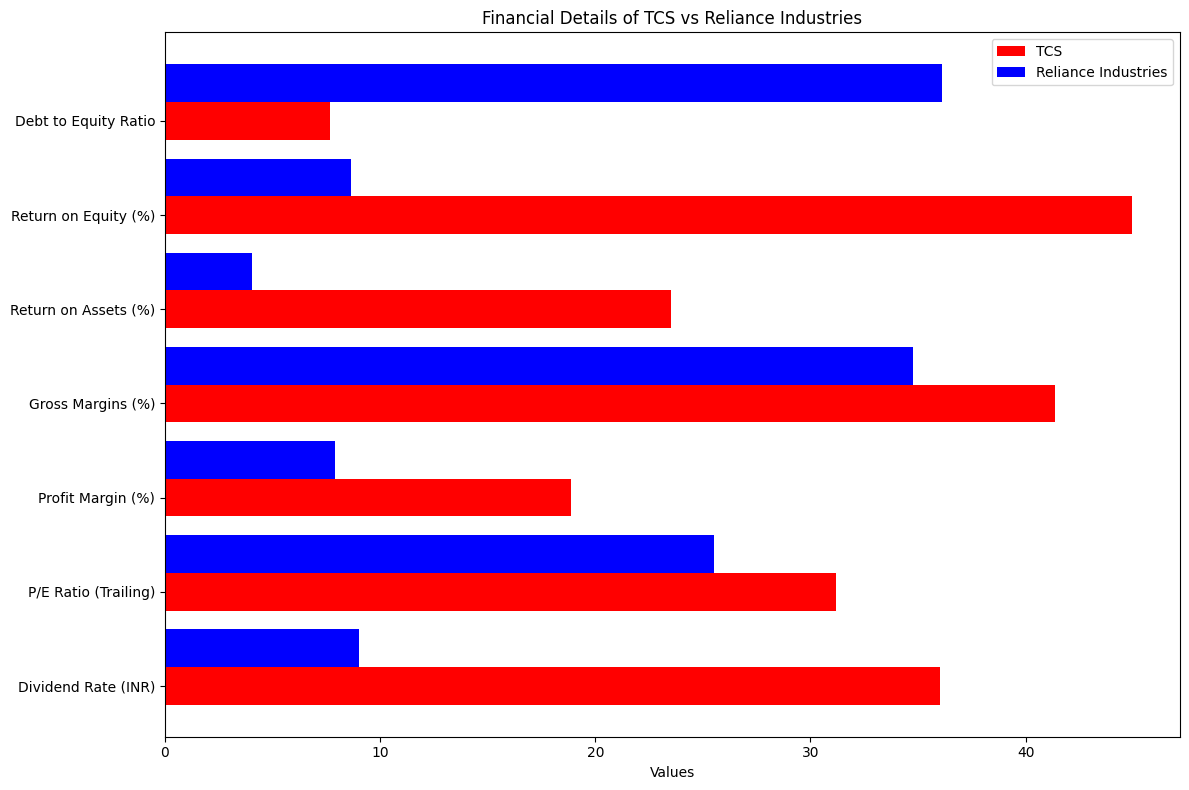

In [25]:
financial_details_tcs = {

    'Dividend Rate (INR)': 36.00,
    'P/E Ratio (Trailing)': 31.20,

    'Profit Margin (%)': 18.88,
    'Gross Margins (%)': 41.36,
    'Return on Assets (%)': 23.51,
    'Return on Equity (%)': 44.93,
    'Debt to Equity Ratio': 7.66,
}

# Financial details for Reliance Industries
financial_details_reliance = {

    'Dividend Rate (INR)': 9.0,
    'P/E Ratio (Trailing)': 25.50,

    'Profit Margin (%)': 7.88,
    'Gross Margins (%)': 34.75,
    'Return on Assets (%)': 4.05,
    'Return on Equity (%)': 8.66,
    'Debt to Equity Ratio': 36.1,
}

# Extracting keys and values for both companies
labels = list(financial_details_tcs.keys())
values_tcs = list(financial_details_tcs.values())
values_reliance = list(financial_details_reliance.values())

# Generating positions for the bars
positions_tcs = list(range(len(labels)))
positions_reliance = [pos + 0.4 for pos in positions_tcs]

# Plotting financial details for TCS
plt.figure(figsize=(12, 8))

plt.barh(positions_tcs, values_tcs, color='red', label='TCS', height=0.4)
plt.barh(positions_reliance, values_reliance, color='blue', label='Reliance Industries', height=0.4)

plt.yticks(positions_tcs, labels)
plt.xlabel('Values')
plt.title('Financial Details of TCS vs Reliance Industries')
plt.legend()
plt.tight_layout()
plt.show()

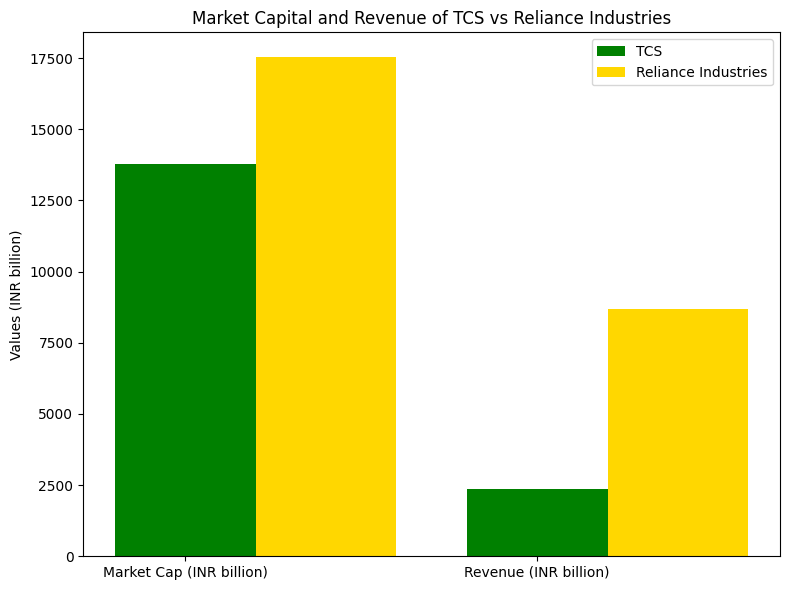

In [26]:
financial_details_tcs = {
    'Market Cap (INR billion)': 13788.90,
    'Revenue (INR billion)': 2364.64,
}

# Financial details for Reliance Industries
financial_details_reliance = {
    'Market Cap (INR billion)': 17525.92,
    'Revenue (INR billion)': 8690.16,
}

# Extracting keys and values for both companies
labels = list(financial_details_tcs.keys())
values_tcs = list(financial_details_tcs.values())
values_reliance = list(financial_details_reliance.values())

# Generating positions for the bars
positions_tcs = list(range(len(labels)))
positions_reliance = [pos + 0.4 for pos in positions_tcs]

# Plotting financial details for TCS and Reliance
plt.figure(figsize=(8, 6))

plt.bar(positions_tcs, values_tcs, color='green', width=0.4, label='TCS')
plt.bar(positions_reliance, values_reliance, color='gold', width=0.4, label='Reliance Industries')

plt.xticks(positions_tcs, labels)
plt.ylabel('Values (INR billion)')
plt.title('Market Capital and Revenue of TCS vs Reliance Industries')
plt.legend()
plt.tight_layout()
plt.show()

In [27]:
price_tcs.balance_sheet

,2023-03-31,2022-03-31,2021-03-31
Treasury Shares Number,NaN,0.0,0.0
Ordinary Shares Number,3659051373.0,3659051373.0,3699051373.0
Share Issued,3659051373.0,3659051373.0,3699051373.0
Total Debt,76880000000.0,78180000000.0,77950000000.0
Tangible Book Value,876030000000.0,861180000000.0,841550000000.0
...,...,...,...
Cash Cash Equivalents And Short Term Investments,471980000000.0,483010000000.0,383960000000.0
Other Short Term Investments,400830000000.0,358450000000.0,315380000000.0
Cash And Cash Equivalents,71150000000.0,124560000000.0,68580000000.0
Cash Equivalents,49990000000.0,102770000000.0,15860000000.0


In [28]:
price_relnce.balance_sheet

,2023-03-31,2022-03-31,2021-03-31
Ordinary Shares Number,6766094014.0,6765994014.0,6762068814.0
Share Issued,6766094014.0,6765994014.0,6762068814.0
Net Debt,2400000000000.0,2327960000000.0,2373050000000.0
Total Debt,3351340000000.0,2819740000000.0,2601250000000.0
Tangible Book Value,4919100000000.0,5476870000000.0,5551980000000.0
...,...,...,...
Cash Cash Equivalents And Short Term Investments,2234170000000.0,1529000000000.0,1747420000000.0
Other Short Term Investments,1487090000000.0,1193910000000.0,1602360000000.0
Cash And Cash Equivalents,747080000000.0,335090000000.0,145060000000.0
Cash Equivalents,NaN,246890000000.0,60390000000.0


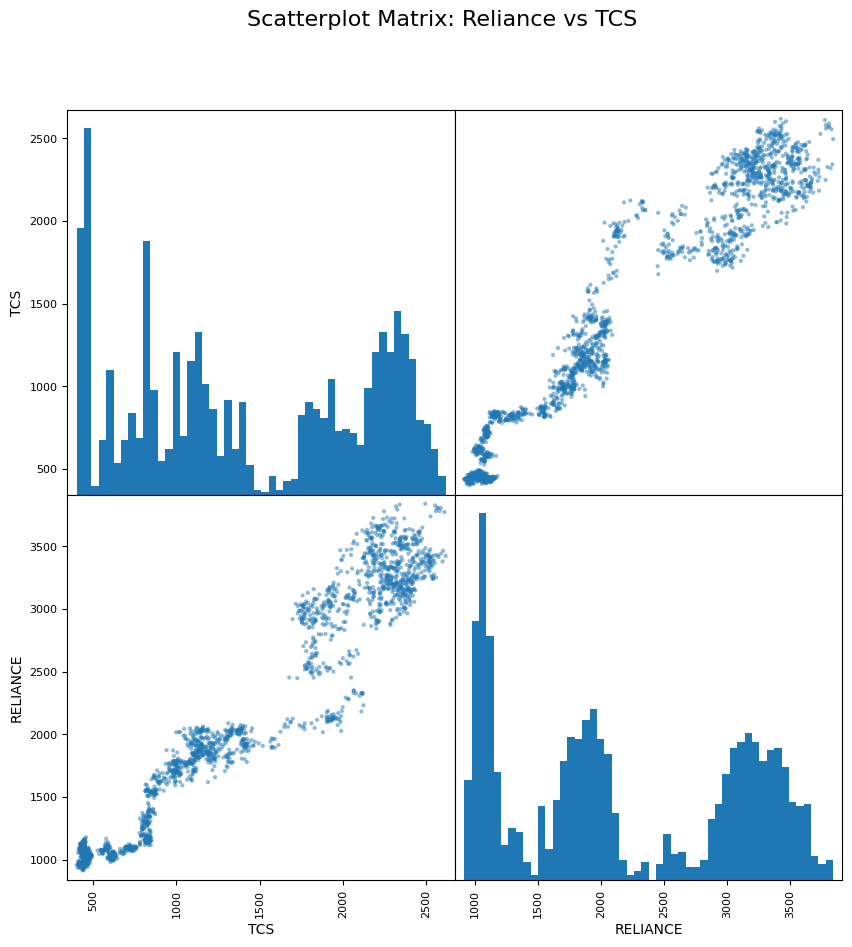

In [29]:
open_prices = price_list['Open']

# Creating a DataFrame with the 'Open' prices of the selected stocks
open_prices.columns = ['TCS', 'RELIANCE']
open_prices = open_prices.dropna()

# Scatterplot Matrix
scatter_matrix(open_prices, figsize=(10, 10), hist_kwds={'bins': 50})
plt.suptitle('Scatterplot Matrix: Reliance vs TCS', fontsize=16)
plt.show()

In [30]:
price_tcs = yf.download('TCS.NS', start='2023-01-01', end='2023-12-31')
price_relnce = yf.download('RELIANCE.NS', start='2023-01-01', end='2023-12-31')
price_tcs['Returns'] = (price_tcs['Close'] / price_tcs['Close'].shift(1)) - 1
price_relnce['Returns'] = (price_relnce['Close'] / price_relnce['Close'].shift(1)) - 1
# Drop the first row containing NaN due to shift(1)
price_tcs.dropna(inplace=True)
price_relnce.dropna(inplace=True)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [31]:
price_tcs.head()

,Open,High,Low,Close,Adj Close,Volume,Returns
Date,,,,,,,
2023-01-03,3252.000000,3320.000000,3245.300049,3311.350098,3190.214355,1245178,0.015300
2023-01-04,3306.699951,3327.350098,3286.199951,3314.649902,3193.393066,1231668,0.000997
2023-01-05,3330.199951,3337.300049,3281.949951,3311.100098,3189.972900,1826057,-0.001071
2023-01-06,3300.000000,3301.550049,3200.000000,3211.550049,3094.064697,2488376,-0.030066
2023-01-09,3229.000000,3327.000000,3221.149902,3319.949951,3198.499268,2885060,0.033753


In [32]:
price_relnce.head()

,Open,High,Low,Close,Adj Close,Volume,Returns
Date,,,,,,,
2023-01-03,2367.540283,2374.878174,2351.618652,2360.156250,2351.848389,3829466,-0.007318
2023-01-04,2360.110107,2363.848389,2320.421143,2324.620850,2316.438232,4632445,-0.015056
2023-01-05,2329.189697,2341.096436,2311.191162,2320.467285,2312.299316,6818549,-0.001787
2023-01-06,2332.097168,2351.757080,2324.390137,2341.557861,2333.315430,3174798,0.009089
2023-01-09,2349.311035,2401.645264,2347.511230,2396.845459,2388.408447,5361376,0.023611


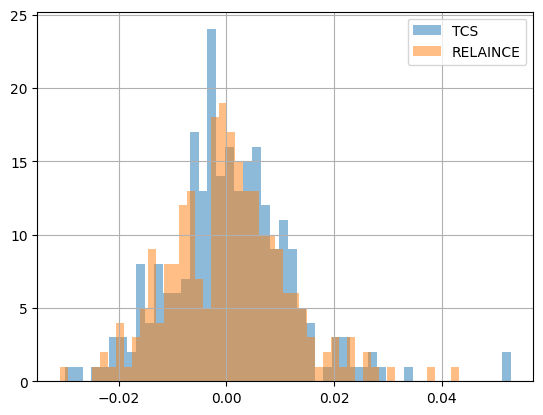

In [33]:
price_tcs['Returns'].hist(bins=50,label='TCS',alpha=0.5)
price_relnce['Returns'].hist(bins=50,label='RELAINCE',alpha=0.5)
plt.legend()

<Axes: >

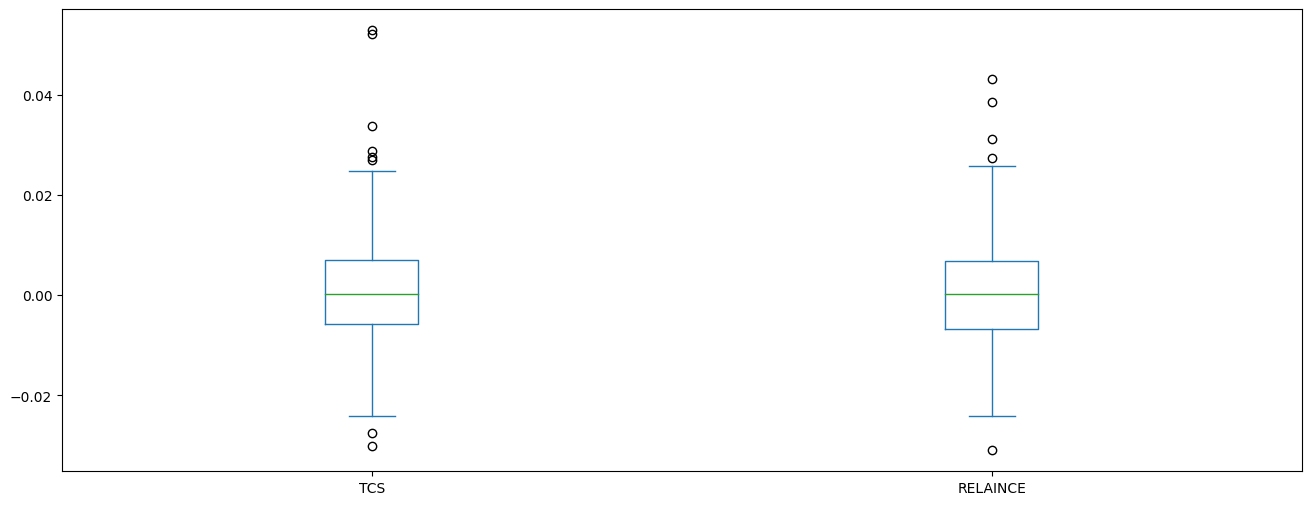

In [34]:
stock_list = pd.concat([price_tcs['Returns'],price_relnce['Returns']],axis=1)
stock_list.columns = ['TCS','RELAINCE']
stock_list.plot(kind='box',figsize=(16,6))

In [35]:
price_tcs['Cumulative Returns'] = (1+ price_tcs['Returns']).cumprod()
price_relnce['Cumulative Returns'] = (1+ price_relnce['Returns']).cumprod()

In [36]:
price_tcs.head()

,Open,High,Low,Close,Adj Close,Volume,Returns,Cumulative Returns
Date,,,,,,,,
2023-01-03,3252.000000,3320.000000,3245.300049,3311.350098,3190.214355,1245178,0.015300,1.015300
2023-01-04,3306.699951,3327.350098,3286.199951,3314.649902,3193.393066,1231668,0.000997,1.016312
2023-01-05,3330.199951,3337.300049,3281.949951,3311.100098,3189.972900,1826057,-0.001071,1.015223
2023-01-06,3300.000000,3301.550049,3200.000000,3211.550049,3094.064697,2488376,-0.030066,0.984700
2023-01-09,3229.000000,3327.000000,3221.149902,3319.949951,3198.499268,2885060,0.033753,1.017937


In [37]:
price_relnce.head()

,Open,High,Low,Close,Adj Close,Volume,Returns,Cumulative Returns
Date,,,,,,,,
2023-01-03,2367.540283,2374.878174,2351.618652,2360.156250,2351.848389,3829466,-0.007318,0.992682
2023-01-04,2360.110107,2363.848389,2320.421143,2324.620850,2316.438232,4632445,-0.015056,0.977736
2023-01-05,2329.189697,2341.096436,2311.191162,2320.467285,2312.299316,6818549,-0.001787,0.975989
2023-01-06,2332.097168,2351.757080,2324.390137,2341.557861,2333.315430,3174798,0.009089,0.984860
2023-01-09,2349.311035,2401.645264,2347.511230,2396.845459,2388.408447,5361376,0.023611,1.008114


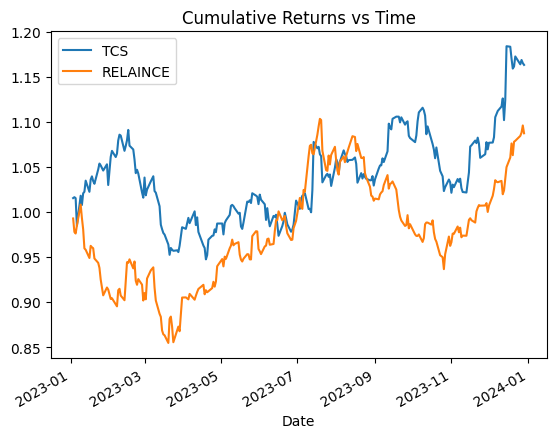

In [38]:
price_tcs['Cumulative Returns'].plot(label='TCS')
price_relnce['Cumulative Returns'].plot(label='RELAINCE')
plt.title('Cumulative Returns vs Time')
plt.legend()